### Importing Needed packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

### Reading the Data in

In [3]:
df = pd.read_csv("btc-usd.csv")

# take a look at the dataset
print(df.shape)
df.head(10)

(1462, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-27,16163.500000,16930.900391,15114.299805,15838.500000,15838.500000,12487600128
1,2017-12-28,15864.099609,15888.400391,13937.299805,14606.500000,14606.500000,12336499712
2,2017-12-29,14695.799805,15279.000000,14307.000000,14656.200195,14656.200195,13025500160
3,2017-12-30,14681.900391,14681.900391,12350.099609,12952.200195,12952.200195,14452599808
4,2017-12-31,12897.700195,14377.400391,12755.599609,14156.400391,14156.400391,12136299520
5,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
6,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
7,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
8,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
9,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [4]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1452,2021-12-18,46219.253906,47313.828125,45598.441406,46848.777344,46848.777344,26098292690
1453,2021-12-19,46853.867188,48089.664063,46502.953125,46707.015625,46707.015625,25154053861
1454,2021-12-20,46707.062500,47401.718750,45579.808594,46880.277344,46880.277344,30961902129
1455,2021-12-21,46886.078125,49300.917969,46698.773438,48936.613281,48936.613281,27055803928
1456,2021-12-22,48937.097656,49544.796875,48450.941406,48628.511719,48628.511719,24447979559
1457,2021-12-23,48626.343750,51332.339844,48065.835938,50784.539063,50784.539063,28223878108
1458,2021-12-24,50806.050781,51814.027344,50514.496094,50822.195313,50822.195313,24367912228
1459,2021-12-25,50854.917969,51176.597656,50236.707031,50429.859375,50429.859375,19030650914
1460,2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625,50809.515625,20964372926
1461,2021-12-27,50847.507813,51133.164063,50512.203125,50863.812500,50863.812500,20899280896


Let's see how many null values there are in the dataset

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Data exploration
Let's first have a descriptive exploration on our data.

In [6]:
# summarize the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1.462000e+03
mean,18263.281176,18751.984190,17720.490465,18283.955976,18283.955976,2.568541e+10
std,17678.500204,18172.781829,17114.673795,17693.065539,17693.065539,2.116916e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,7117.741088,7277.625610,6899.632325,7116.905029,7116.905029,8.085328e+09
50%,9474.383789,9653.905274,9266.268555,9476.459473,9476.459473,2.186804e+10
75%,25879.870606,27207.558106,25572.749512,26395.851562,26395.851562,3.619186e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


Let's select some of these features to explore more, as Close and Adj Close in our dataset are the same 1:1

In [7]:
cdf = df[['Open','High','Low','Close','Volume']]
cdf.head(8)

,Open,High,Low,Close,Volume
0,16163.500000,16930.900391,15114.299805,15838.500000,12487600128
1,15864.099609,15888.400391,13937.299805,14606.500000,12336499712
2,14695.799805,15279.000000,14307.000000,14656.200195,13025500160
3,14681.900391,14681.900391,12350.099609,12952.200195,14452599808
4,12897.700195,14377.400391,12755.599609,14156.400391,12136299520
5,14112.200195,14112.200195,13154.700195,13657.200195,10291200000
6,13625.000000,15444.599609,13163.599609,14982.099609,16846600192
7,14978.200195,15572.799805,14844.500000,15201.000000,16871900160


Let's plot each of these features:

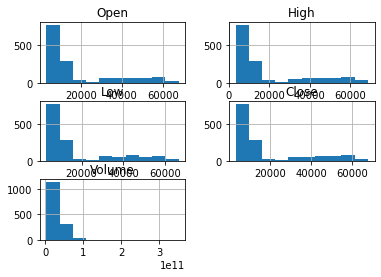

In [8]:
viz = cdf[['Open','High','Low','Close','Volume']]
viz.hist()
plt.show()

Now, let's plot each of them against the Close, to see how linear their relationship is:

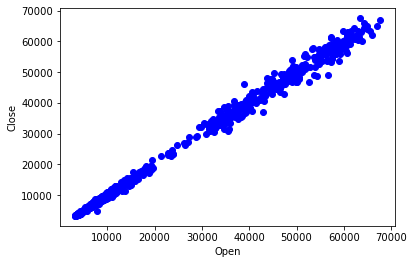

In [9]:
plt.scatter(cdf.Open, cdf.Close, color='blue')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

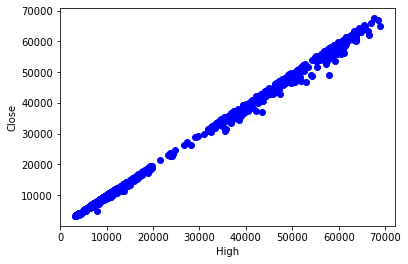

In [10]:
plt.scatter(cdf.High, cdf.Close, color='blue')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

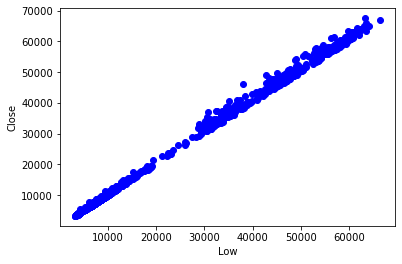

In [11]:
plt.scatter(cdf.Low, cdf.Close, color='blue')
plt.xlabel('Low')
plt.ylabel('Close')
plt.show()

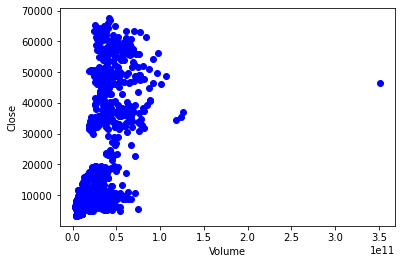

In [12]:
plt.scatter(cdf.Volume, cdf.Close, color='blue')
plt.xlabel('Volume')
plt.ylabel('Close')
plt.show()

<AxesSubplot:>

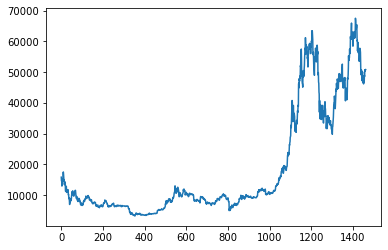

In [13]:
df['Close'].plot()

### Creating train and test dataset
Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for the testing. We create a mask to select random rows using np.random.rand() function:

In [14]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Multiple Linear Regression Model

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Open','High','Low','Volume']])
y = np.asanyarray(train[['Close']])
regr.fit(x,y) # fit linear model

# The coefficients
print('Coefficients: ', regr.coef_)
# The intercept
print('Intercept: ', regr.intercept_)

Coefficients:  [[-5.61609048e-01  9.23342869e-01  6.32470192e-01  5.76569681e-10]]
Intercept:  [1.44436919]


### Prediction

Residual sum of squares: $$RSS = \sum_{i=1}^{n} (y-\hat{y})^2$$

In [16]:
y_predicted = regr.predict(test[['Open','High','Low','Volume']])
x = np.asanyarray(test[['Open','High','Low','Volume']])
y = np.asanyarray(test[['Close']])

# Residual Sum of Squares
print("Residual sum of squares: " , np.mean((y_predicted - y) ** 2))
# Explained variance score: 1 is perfect prediction
print("Variance score: ", regr.score(x,y))

print()
# Root Mean Squared Error
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Residual sum of squares:  157802.32408915073
Variance score:  0.999517423560976

Root mean squared error:  157802.32408915073
R2 score:  0.999517423560976


C:\Users\Johnny\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$\
The best possible score is 1.0, the lower values are worse.


### Comparing Predicted vs True Close Value - Multiple Regression Model

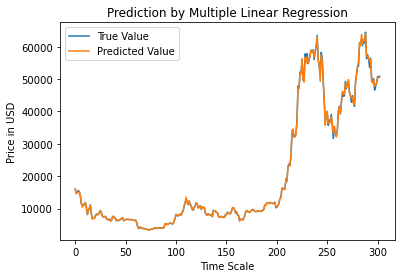

In [63]:
# Predicted vs Close value
plt.plot(y, label='True Value')
plt.plot(y_predicted, label='Predicted Value')
plt.title('Prediction by Multiple Linear Regression')
plt.xlabel('Time Scale')
plt.ylabel('Price in USD')
plt.legend()
plt.show()